In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df_cleaned_drop_IF = pd.read_csv('./Data/cleaned_drop_IF.csv')
df_cleaned_drop_IQR = pd.read_csv('./Data/cleaned_drop_IQR.csv')
df_cleaned_mean_IF = pd.read_csv('./Data/cleaned_mean_IF.csv')
df_cleaned_mean_IQR = pd.read_csv('./Data/cleaned_mean_IQR.csv')
df_cleaned_median_IF = pd.read_csv('./Data/cleaned_median_IF.csv')
df_cleaned_median_IQR = pd.read_csv('./Data/cleaned_median_IQR.csv')

df_cleaned_drop_IF = df_cleaned_drop_IF 

### Cleaning Data df_cleaned_drop_IF
- Drop 	from_airport_code
- Drop  dest_airport_code, aircraft_type, airline_number, airline_name, flight_number, departure_time	arrival_time, currency, co2_emissions, avg_co2_emission_for_this_route, co2_percentage ,scan_date
- Change duration to hr

In [2]:
df_cleaned_drop_IF

,from_airport_code,from_country,dest_airport_code,dest_country,aircraft_type,airline_number,airline_name,flight_number,departure_time,arrival_time,duration,stops,price,currency,co2_emissions,avg_co2_emission_for_this_route,co2_percentage,scan_date
0,YYZ,Canada,ADD,Ethiopia,Airbus A220-300 Passenger|Boeing 777|Airbus A350,multi,[Air Canada| Ethiopian],AC418|AC418|AC418,2022-05-02 16:00:00,2022-05-04 06:00:00,1860,2,820.0,USD,1089000.0,1126000.0,-3.0,2022-04-29 17:52:59
1,CAI,Egypt,NRT,Japan,Airbus A330|Airbus A320|Boeing 787,multi,[EgyptAir| Saudia| Etihad],MS663|MS663|MS663,2022-08-28 23:25:00,2022-08-30 13:00:00,1835,2,7754.0,USD,1091000.0,1203000.0,-9.0,2022-04-29 17:52:59
2,SYD,Australia,DEL,India,Boeing 737|Boeing 787,multi,[Qantas| Air India],QF445|QF445,2022-05-14 13:15:00,2022-05-15 16:55:00,1930,1,5225.0,USD,1152000.0,1202000.0,-4.0,2022-04-29 17:52:59
3,HGH,China,FRA,Germany,Boeing 737|Boeing 787|Embraer 190,multi,[XiamenAir| KLM],MF8080|MF8080|MF8080,2022-05-03 17:15:00,2022-05-05 11:00:00,2865,2,2200.0,USD,1043000.0,1138000.0,-8.0,2022-04-29 17:52:59
4,YYZ,Canada,ICN,South Korea,Airbus A321|Airbus A350,DL,[Delta],DL1212|DL1212,2022-08-27 06:15:00,2022-08-28 15:50:00,1235,1,990.0,USD,1086000.0,1162000.0,-6.0,2022-04-29 17:52:59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,VIE,Austria,BOG,Columbia,Canadair RJ 900|Airbus A320neo|Boeing 787,multi,[Lufthansa| Avianca],LH2329|LH2329|LH2329,2022-08-27 13:15:00,2022-08-28 03:29:00,1274,2,1657.0,USD,1037000.0,963000.0,7.0,2022-04-29 17:52:59
99991,CNF,Brazil,YYZ,Canada,Boeing 737|Boeing 777|Bombardier Regional Jet 550,multi,[Gol| United],G31305|G31305|G31305,2022-05-02 10:00:00,2022-05-03 08:50:00,1430,2,1673.0,USD,1032000.0,965000.0,6.0,2022-04-29 17:52:59
99992,CPH,Denmark,BOG,Columbia,Airbus A321|Airbus A320neo|Boeing 787,multi,[Lufthansa| Avianca],LH827|LH827|LH827,2022-05-15 11:55:00,2022-05-16 03:29:00,1354,2,1721.0,USD,1025000.0,967000.0,6.0,2022-04-29 17:52:59
99993,CNF,Brazil,YYZ,Canada,Airbus A320|Boeing 777|Bombardier Regional Jet...,multi,[LATAM| United],LA3045|LA3045|LA3045,2022-05-02 14:05:00,2022-05-03 08:50:00,1185,2,1673.0,USD,1032000.0,965000.0,6.0,2022-04-29 17:52:59


In [3]:
df_cleaned_drop_IF[df_cleaned_drop_IF['from_country'] == 'Columbia']['from_airport_code'].unique()

array(['BOG'], dtype=object)

In [4]:
# Drop specified columns
df_cleaned_drop_IF = df_cleaned_drop_IF.drop(columns=[
    'from_airport_code',
    'dest_airport_code',
    'airline_number',
    'flight_number',
    'currency',
    'co2_emissions',
    'avg_co2_emission_for_this_route',
    'co2_percentage',
    'scan_date'
])

# Convert duration from minutes to hours (assuming 'duration' is in minutes)
df_cleaned_drop_IF['duration'] = df_cleaned_drop_IF['duration'] / 60

### Change 'departure_time' (2022-05-02 16:00:00) and 'arrival_time' (2022-05-04 06:00:00	)  to ['Night', 'Evening', 'Morning', 'Afternoon', 'Early_Morning']

In [5]:
df_cleaned_drop_IF

,from_country,dest_country,aircraft_type,airline_name,departure_time,arrival_time,duration,stops,price
0,Canada,Ethiopia,Airbus A220-300 Passenger|Boeing 777|Airbus A350,[Air Canada| Ethiopian],2022-05-02 16:00:00,2022-05-04 06:00:00,31.000000,2,820.0
1,Egypt,Japan,Airbus A330|Airbus A320|Boeing 787,[EgyptAir| Saudia| Etihad],2022-08-28 23:25:00,2022-08-30 13:00:00,30.583333,2,7754.0
2,Australia,India,Boeing 737|Boeing 787,[Qantas| Air India],2022-05-14 13:15:00,2022-05-15 16:55:00,32.166667,1,5225.0
3,China,Germany,Boeing 737|Boeing 787|Embraer 190,[XiamenAir| KLM],2022-05-03 17:15:00,2022-05-05 11:00:00,47.750000,2,2200.0
4,Canada,South Korea,Airbus A321|Airbus A350,[Delta],2022-08-27 06:15:00,2022-08-28 15:50:00,20.583333,1,990.0
...,...,...,...,...,...,...,...,...,...
99990,Austria,Columbia,Canadair RJ 900|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],2022-08-27 13:15:00,2022-08-28 03:29:00,21.233333,2,1657.0
99991,Brazil,Canada,Boeing 737|Boeing 777|Bombardier Regional Jet 550,[Gol| United],2022-05-02 10:00:00,2022-05-03 08:50:00,23.833333,2,1673.0
99992,Denmark,Columbia,Airbus A321|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],2022-05-15 11:55:00,2022-05-16 03:29:00,22.566667,2,1721.0
99993,Brazil,Canada,Airbus A320|Boeing 777|Bombardier Regional Jet...,[LATAM| United],2022-05-02 14:05:00,2022-05-03 08:50:00,19.750000,2,1673.0


In [6]:
import pandas as pd

# Define a function to convert hour to time of day
def time_of_day(hour):
    if 0 <= hour < 5:
        return 'Early_Morning'
    elif 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Convert strings to datetime if necessary
df_cleaned_drop_IF['departure_time'] = pd.to_datetime(df_cleaned_drop_IF['departure_time'])
df_cleaned_drop_IF['arrival_time'] = pd.to_datetime(df_cleaned_drop_IF['arrival_time'])

# Apply the function to get time of day categories
df_cleaned_drop_IF['departure_time_of_day'] = df_cleaned_drop_IF['departure_time'].dt.hour.apply(time_of_day)
df_cleaned_drop_IF['arrival_time_of_day'] = df_cleaned_drop_IF['arrival_time'].dt.hour.apply(time_of_day)

# Drop the original datetime columns if no longer needed
df_cleaned_drop_IF = df_cleaned_drop_IF.drop(columns=['departure_time', 'arrival_time'])


In [7]:
df_cleaned_drop_IF

,from_country,dest_country,aircraft_type,airline_name,duration,stops,price,departure_time_of_day,arrival_time_of_day
0,Canada,Ethiopia,Airbus A220-300 Passenger|Boeing 777|Airbus A350,[Air Canada| Ethiopian],31.000000,2,820.0,Afternoon,Morning
1,Egypt,Japan,Airbus A330|Airbus A320|Boeing 787,[EgyptAir| Saudia| Etihad],30.583333,2,7754.0,Night,Afternoon
2,Australia,India,Boeing 737|Boeing 787,[Qantas| Air India],32.166667,1,5225.0,Afternoon,Afternoon
3,China,Germany,Boeing 737|Boeing 787|Embraer 190,[XiamenAir| KLM],47.750000,2,2200.0,Evening,Morning
4,Canada,South Korea,Airbus A321|Airbus A350,[Delta],20.583333,1,990.0,Morning,Afternoon
...,...,...,...,...,...,...,...,...,...
99990,Austria,Columbia,Canadair RJ 900|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],21.233333,2,1657.0,Afternoon,Early_Morning
99991,Brazil,Canada,Boeing 737|Boeing 777|Bombardier Regional Jet 550,[Gol| United],23.833333,2,1673.0,Morning,Morning
99992,Denmark,Columbia,Airbus A321|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],22.566667,2,1721.0,Morning,Early_Morning
99993,Brazil,Canada,Airbus A320|Boeing 777|Bombardier Regional Jet...,[LATAM| United],19.750000,2,1673.0,Afternoon,Morning


### How Does the Ticket Price vary with the number of departure_time_of_day?

C:\Users\punna\AppData\Local\Temp\ipykernel_44828\2721494405.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_drop_IF, x='departure_time_of_day', y='price', palette='Set3')


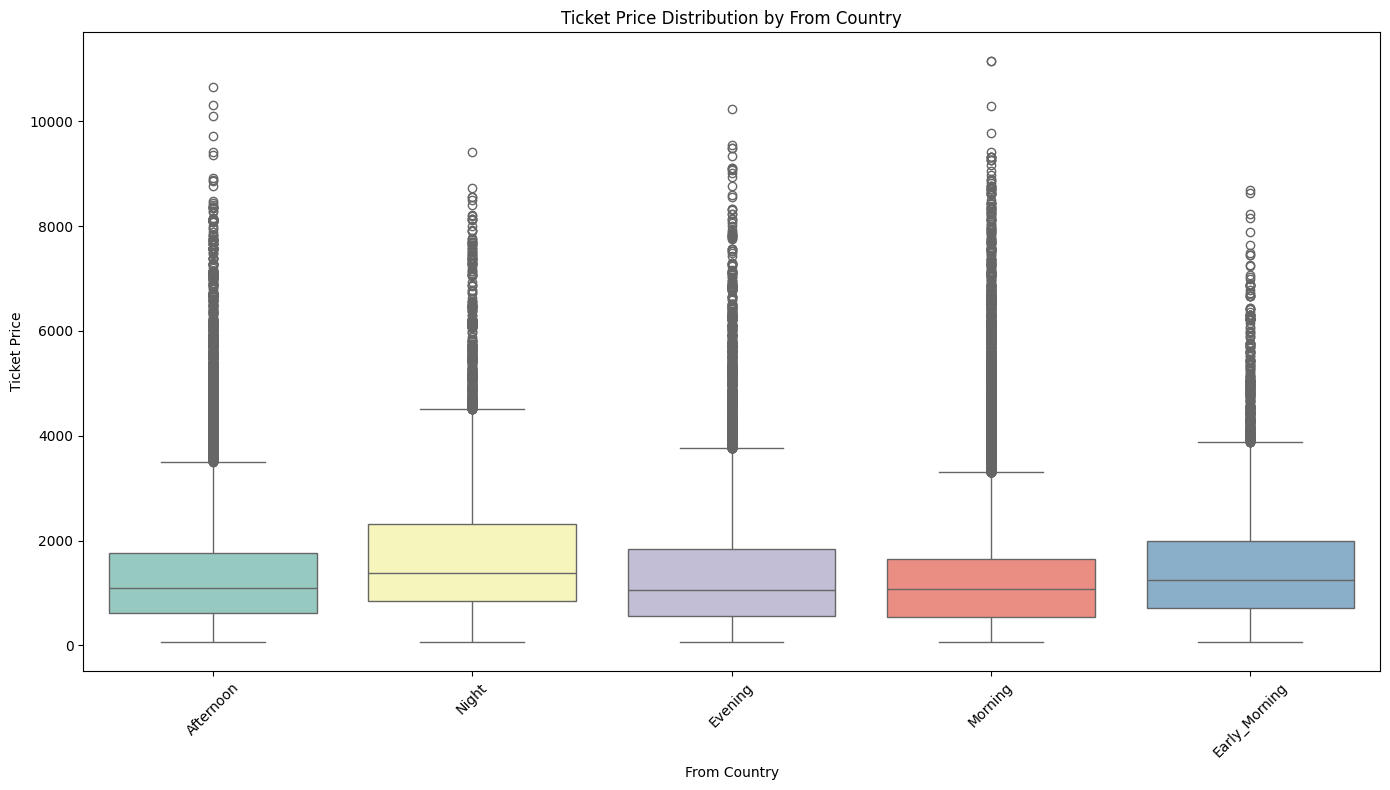

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned_drop_IF, x='departure_time_of_day', y='price', palette='Set3')

plt.xticks(rotation=45)
plt.title('Ticket Price Distribution by From Country')
plt.xlabel('From Country')
plt.ylabel('Ticket Price')
plt.tight_layout()
plt.show()

In [9]:
# import category_encoders as ce

# # Initialize encoder
# encoder = ce.TargetEncoder(cols=['departure_time_of_day'])

# # Fit and transform
# df_cleaned_drop_IF['departure_time_encoded'] = encoder.fit_transform(
#     df_cleaned_drop_IF['departure_time_of_day'], 
#     df_cleaned_drop_IF['price']
# )

In [10]:
df_cleaned_drop_IF

,from_country,dest_country,aircraft_type,airline_name,duration,stops,price,departure_time_of_day,arrival_time_of_day
0,Canada,Ethiopia,Airbus A220-300 Passenger|Boeing 777|Airbus A350,[Air Canada| Ethiopian],31.000000,2,820.0,Afternoon,Morning
1,Egypt,Japan,Airbus A330|Airbus A320|Boeing 787,[EgyptAir| Saudia| Etihad],30.583333,2,7754.0,Night,Afternoon
2,Australia,India,Boeing 737|Boeing 787,[Qantas| Air India],32.166667,1,5225.0,Afternoon,Afternoon
3,China,Germany,Boeing 737|Boeing 787|Embraer 190,[XiamenAir| KLM],47.750000,2,2200.0,Evening,Morning
4,Canada,South Korea,Airbus A321|Airbus A350,[Delta],20.583333,1,990.0,Morning,Afternoon
...,...,...,...,...,...,...,...,...,...
99990,Austria,Columbia,Canadair RJ 900|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],21.233333,2,1657.0,Afternoon,Early_Morning
99991,Brazil,Canada,Boeing 737|Boeing 777|Bombardier Regional Jet 550,[Gol| United],23.833333,2,1673.0,Morning,Morning
99992,Denmark,Columbia,Airbus A321|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],22.566667,2,1721.0,Morning,Early_Morning
99993,Brazil,Canada,Airbus A320|Boeing 777|Bombardier Regional Jet...,[LATAM| United],19.750000,2,1673.0,Afternoon,Morning


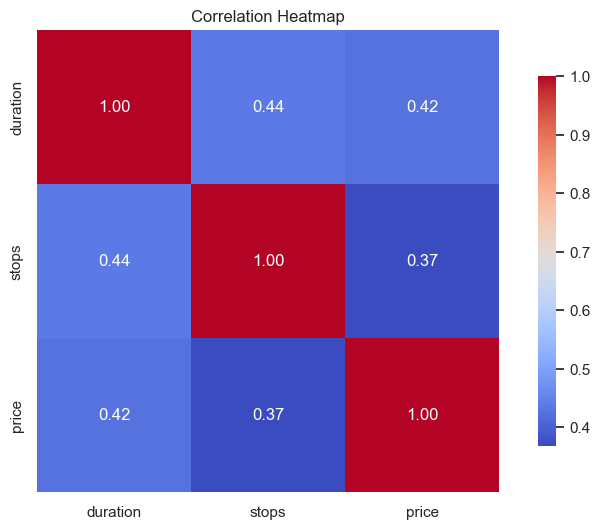

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_cleaned_drop_IF.select_dtypes(include=['float64', 'int64']).copy()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

### How Does the Ticket Price vary with the number of arrival_time_of_day?

C:\Users\punna\AppData\Local\Temp\ipykernel_44828\3434602150.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_drop_IF, x='arrival_time_of_day', y='price', palette='Set3')


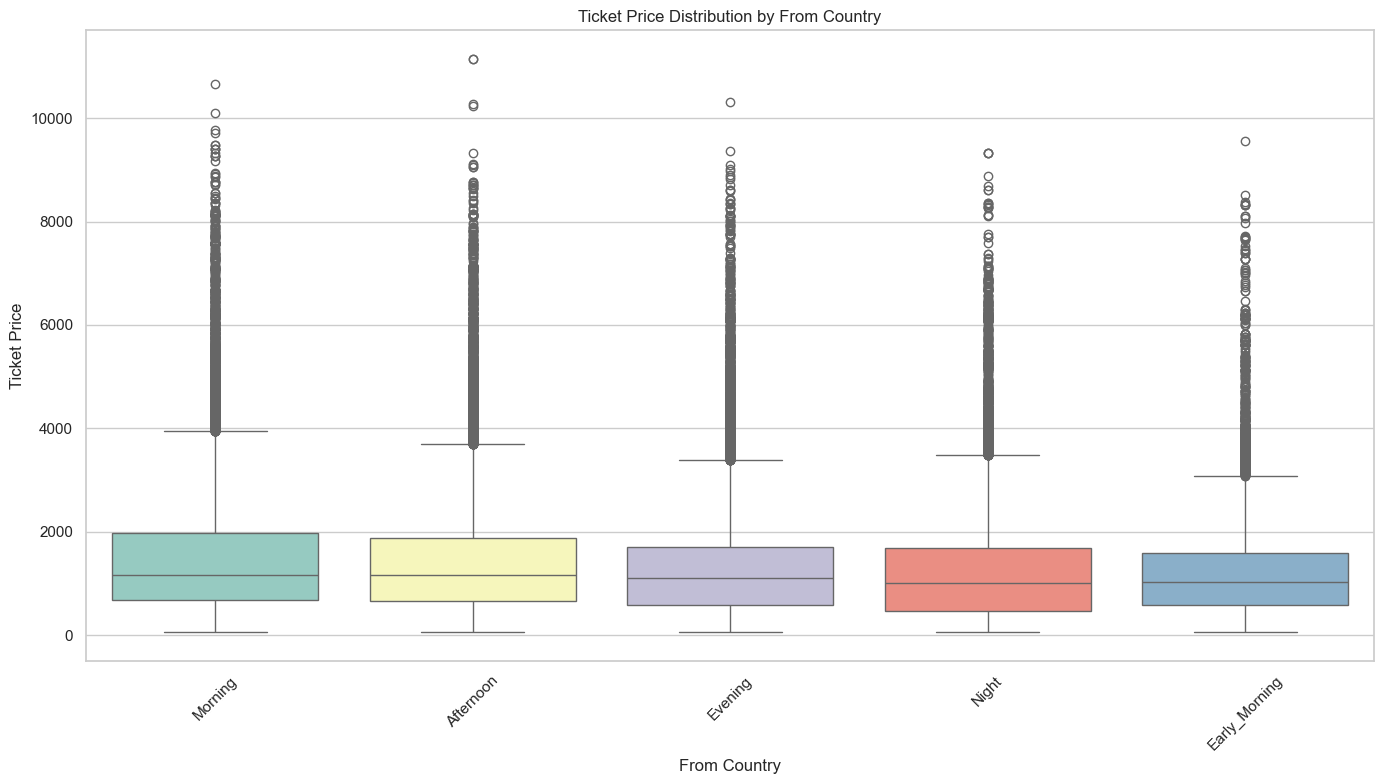

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned_drop_IF, x='arrival_time_of_day', y='price', palette='Set3')

plt.xticks(rotation=45)
plt.title('Ticket Price Distribution by From Country')
plt.xlabel('From Country')
plt.ylabel('Ticket Price')
plt.tight_layout()
plt.show()

In [13]:
# import category_encoders as ce

# # Initialize encoder
# encoder = ce.TargetEncoder(cols=['arrival_time_of_day'])

# # Fit and transform
# df_cleaned_drop_IF['arrival_time_encoded'] = encoder.fit_transform(
#     df_cleaned_drop_IF['arrival_time_of_day'], 
#     df_cleaned_drop_IF['price']
# )

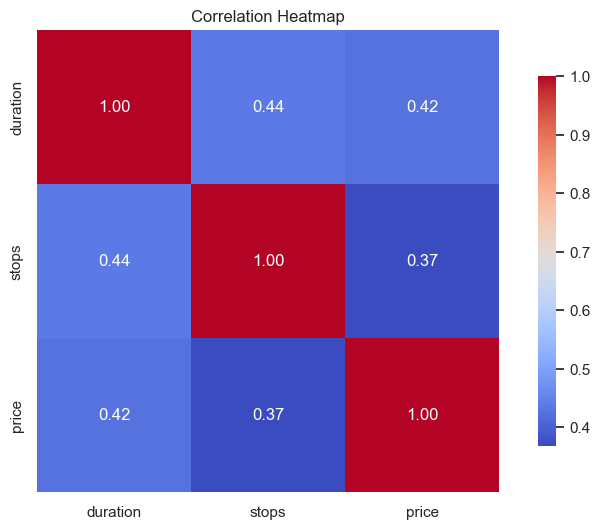

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

df = df_cleaned_drop_IF.select_dtypes(include=['float64', 'int64']).copy()

sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

### How Does the Ticket Price vary with the number of from_country?

C:\Users\punna\AppData\Local\Temp\ipykernel_44828\2052958075.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cleaned_drop_IF, x='from_country', y='price', palette='Set3')


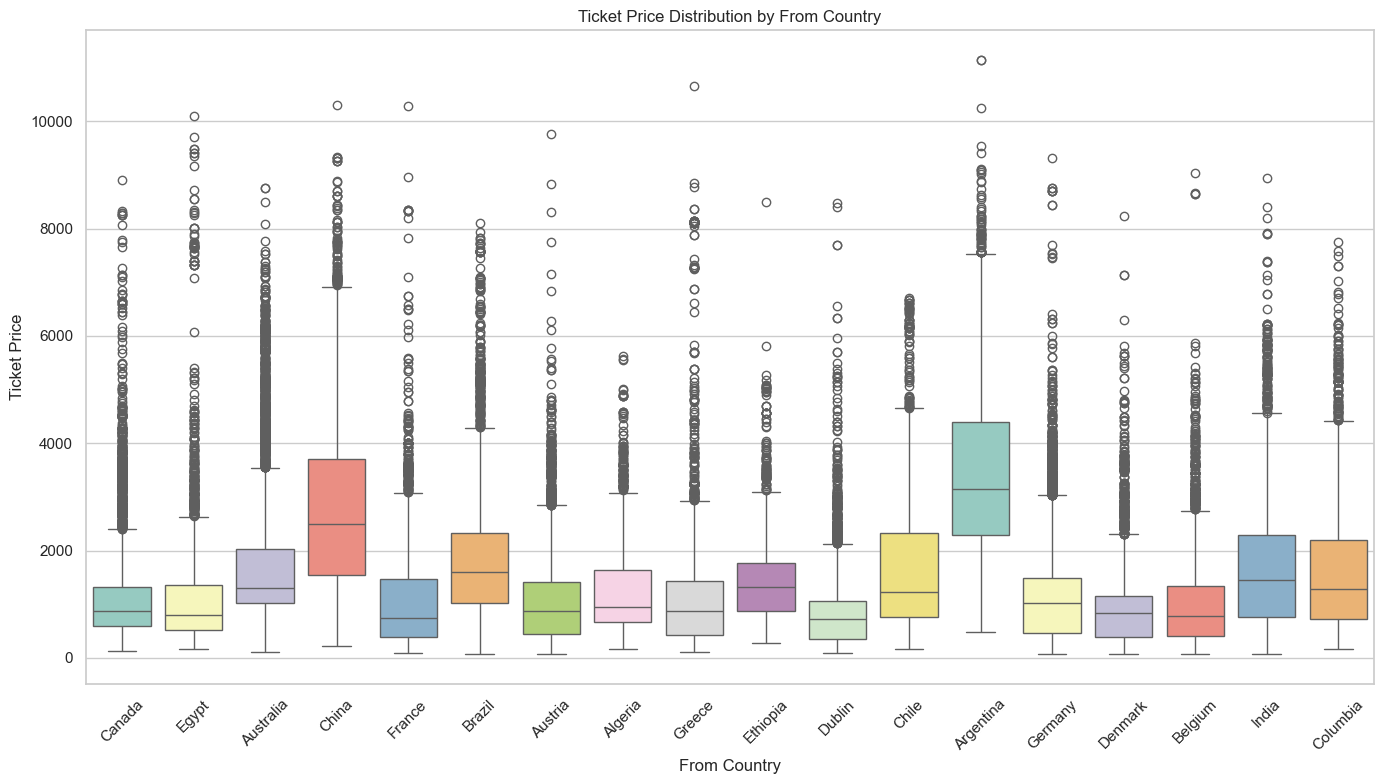

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.boxplot(data=df_cleaned_drop_IF, x='from_country', y='price', palette='Set3')

plt.xticks(rotation=45)
plt.title('Ticket Price Distribution by From Country')
plt.xlabel('From Country')
plt.ylabel('Ticket Price')
plt.tight_layout()
plt.show()

### How Does the Ticket Price vary with the number of duration?

### How Does the Ticket Price vary with the number of stops of a Flight?

C:\Users\punna\AppData\Local\Temp\ipykernel_44828\4103392301.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stops',y='price',data=df_cleaned_drop_IF,palette='hls')


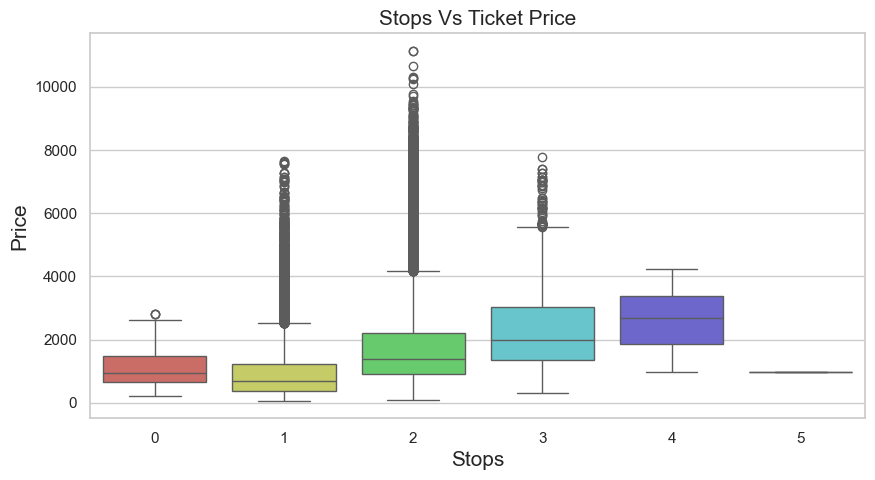

In [16]:
plt.figure(figsize=(10,5))
sns.boxplot(x='stops',y='price',data=df_cleaned_drop_IF,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

### How Does the Ticket Price vary with the number of stops of a departure_time_of_day?


### How Does the Ticket Price vary with the number of stops of a arrival_time_of_day?

In [17]:
df_cleaned_drop_IF

,from_country,dest_country,aircraft_type,airline_name,duration,stops,price,departure_time_of_day,arrival_time_of_day
0,Canada,Ethiopia,Airbus A220-300 Passenger|Boeing 777|Airbus A350,[Air Canada| Ethiopian],31.000000,2,820.0,Afternoon,Morning
1,Egypt,Japan,Airbus A330|Airbus A320|Boeing 787,[EgyptAir| Saudia| Etihad],30.583333,2,7754.0,Night,Afternoon
2,Australia,India,Boeing 737|Boeing 787,[Qantas| Air India],32.166667,1,5225.0,Afternoon,Afternoon
3,China,Germany,Boeing 737|Boeing 787|Embraer 190,[XiamenAir| KLM],47.750000,2,2200.0,Evening,Morning
4,Canada,South Korea,Airbus A321|Airbus A350,[Delta],20.583333,1,990.0,Morning,Afternoon
...,...,...,...,...,...,...,...,...,...
99990,Austria,Columbia,Canadair RJ 900|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],21.233333,2,1657.0,Afternoon,Early_Morning
99991,Brazil,Canada,Boeing 737|Boeing 777|Bombardier Regional Jet 550,[Gol| United],23.833333,2,1673.0,Morning,Morning
99992,Denmark,Columbia,Airbus A321|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],22.566667,2,1721.0,Morning,Early_Morning
99993,Brazil,Canada,Airbus A320|Boeing 777|Bombardier Regional Jet...,[LATAM| United],19.750000,2,1673.0,Afternoon,Morning


In [18]:
import category_encoders as ce

# Get object columns
cat_cols = df_cleaned_drop_IF.select_dtypes(include='object').columns

# Initialize and apply target encoder
encoder = ce.TargetEncoder(cols=cat_cols)
df_encoded = encoder.fit_transform(df_cleaned_drop_IF[cat_cols], df_cleaned_drop_IF['price'])

# Merge the encoded values back into the original DataFrame
df_cleaned_drop_IF = pd.concat([df_cleaned_drop_IF, df_encoded.add_suffix('_encoded')], axis=1)


1. Smoothed Target Mean Encoding (Best for avoiding overfitting)
Instead of directly mapping each category to its mean price, smooth the mean using overall average to prevent overfitting — especially helpful when some categories have very few samples.

In [19]:
def smooth_target_encoding(df, column, target, weight=100):
    global_mean = df[target].mean()
    agg = df.groupby(column)[target].agg(['mean', 'count'])
    smoothing = (agg['count'] * agg['mean'] + weight * global_mean) / (agg['count'] + weight)
    return df[column].map(smoothing)

In [20]:
df_cleaned_drop_IF['departure_time_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, 'departure_time_of_day', 'price'
)
df_cleaned_drop_IF['arrival_time_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, 'arrival_time_of_day', 'price'
)
df_cleaned_drop_IF['from_country_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, 'from_country', 'price'
)
df_cleaned_drop_IF['dest_country_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, 'dest_country', 'price'
)
df_cleaned_drop_IF['airline_name_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, 'airline_name', 'price'
)
df_cleaned_drop_IF['aircraft_type_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, 'aircraft_type', 'price'
)

In [21]:
# df_cleaned_drop_IF.head(1)

In [22]:
# df_cleaned_drop_IF

In [23]:
# Step 1: Clean and split the string into a list of airline names
airline_split = (
    df_cleaned_drop_IF['airline_name']
    .str.strip('[]')                      # remove brackets
    .str.split('|')                       # split by delimiter
    .apply(lambda x: [a.strip() for a in x])  # strip spaces
)

# Step 2: Expand the list into 6 strings (pad with "None" as string)
airline_expanded = airline_split.apply(
    lambda x: x + ["None"]*(6 - len(x)) if len(x) < 6 else x[:6]
)

# Step 3: Create 6 new string columns
for i in range(6):
    df_cleaned_drop_IF[f'airline_{i+1}'] = airline_expanded.apply(lambda x: x[i])



In [24]:
df_cleaned_drop_IF

,from_country,dest_country,aircraft_type,airline_name,duration,stops,price,departure_time_of_day,arrival_time_of_day,from_country_encoded,...,from_country_smooth_encoded,dest_country_smooth_encoded,airline_name_smooth_encoded,aircraft_type_smooth_encoded,airline_1,airline_2,airline_3,airline_4,airline_5,airline_6
0,Canada,Ethiopia,Airbus A220-300 Passenger|Boeing 777|Airbus A350,[Air Canada| Ethiopian],31.000000,2,820.0,Afternoon,Morning,1185.855724,...,1189.580331,1359.966161,1380.840431,1452.148220,Air Canada,Ethiopian,None,None,None,None
1,Egypt,Japan,Airbus A330|Airbus A320|Boeing 787,[EgyptAir| Saudia| Etihad],30.583333,2,7754.0,Night,Afternoon,1103.122350,...,1109.754880,2141.197214,1560.985481,1914.677234,EgyptAir,Saudia,Etihad,None,None,None
2,Australia,India,Boeing 737|Boeing 787,[Qantas| Air India],32.166667,1,5225.0,Afternoon,Afternoon,1744.178830,...,1740.970931,1365.301486,1688.592127,1357.190410,Qantas,Air India,None,None,None,None
3,China,Germany,Boeing 737|Boeing 787|Embraer 190,[XiamenAir| KLM],47.750000,2,2200.0,Evening,Morning,2688.940989,...,2670.065525,1252.400641,1658.298013,1616.463629,XiamenAir,KLM,None,None,None,None
4,Canada,South Korea,Airbus A321|Airbus A350,[Delta],20.583333,1,990.0,Morning,Afternoon,1185.855724,...,1189.580331,1957.296755,1244.916115,1345.444192,Delta,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,Austria,Columbia,Canadair RJ 900|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],21.233333,2,1657.0,Afternoon,Early_Morning,1057.748906,...,1064.078158,1444.918158,1498.554767,1425.897232,Lufthansa,Avianca,None,None,None,None
99991,Brazil,Canada,Boeing 737|Boeing 777|Bombardier Regional Jet 550,[Gol| United],23.833333,2,1673.0,Morning,Morning,1827.208654,...,1821.665031,1679.294281,1718.562450,1446.129711,Gol,United,None,None,None,None
99992,Denmark,Columbia,Airbus A321|Airbus A320neo|Boeing 787,[Lufthansa| Avianca],22.566667,2,1721.0,Morning,Early_Morning,927.759627,...,935.925478,1444.918158,1498.554767,1508.487818,Lufthansa,Avianca,None,None,None,None
99993,Brazil,Canada,Airbus A320|Boeing 777|Bombardier Regional Jet...,[LATAM| United],19.750000,2,1673.0,Afternoon,Morning,1827.208654,...,1821.665031,1679.294281,2241.703353,1458.800833,LATAM,United,None,None,None,None


In [25]:
# df_cleaned_drop_IF['airline_1_smooth_encoded'] = smooth_target_encoding(
#     df_cleaned_drop_IF, 'airline_1', 'price'
# )
for i in range(6):
    df_cleaned_drop_IF[f'airline_{i+1}_smooth_encoded'] = smooth_target_encoding(
    df_cleaned_drop_IF, f'airline_{i+1}', 'price'
)

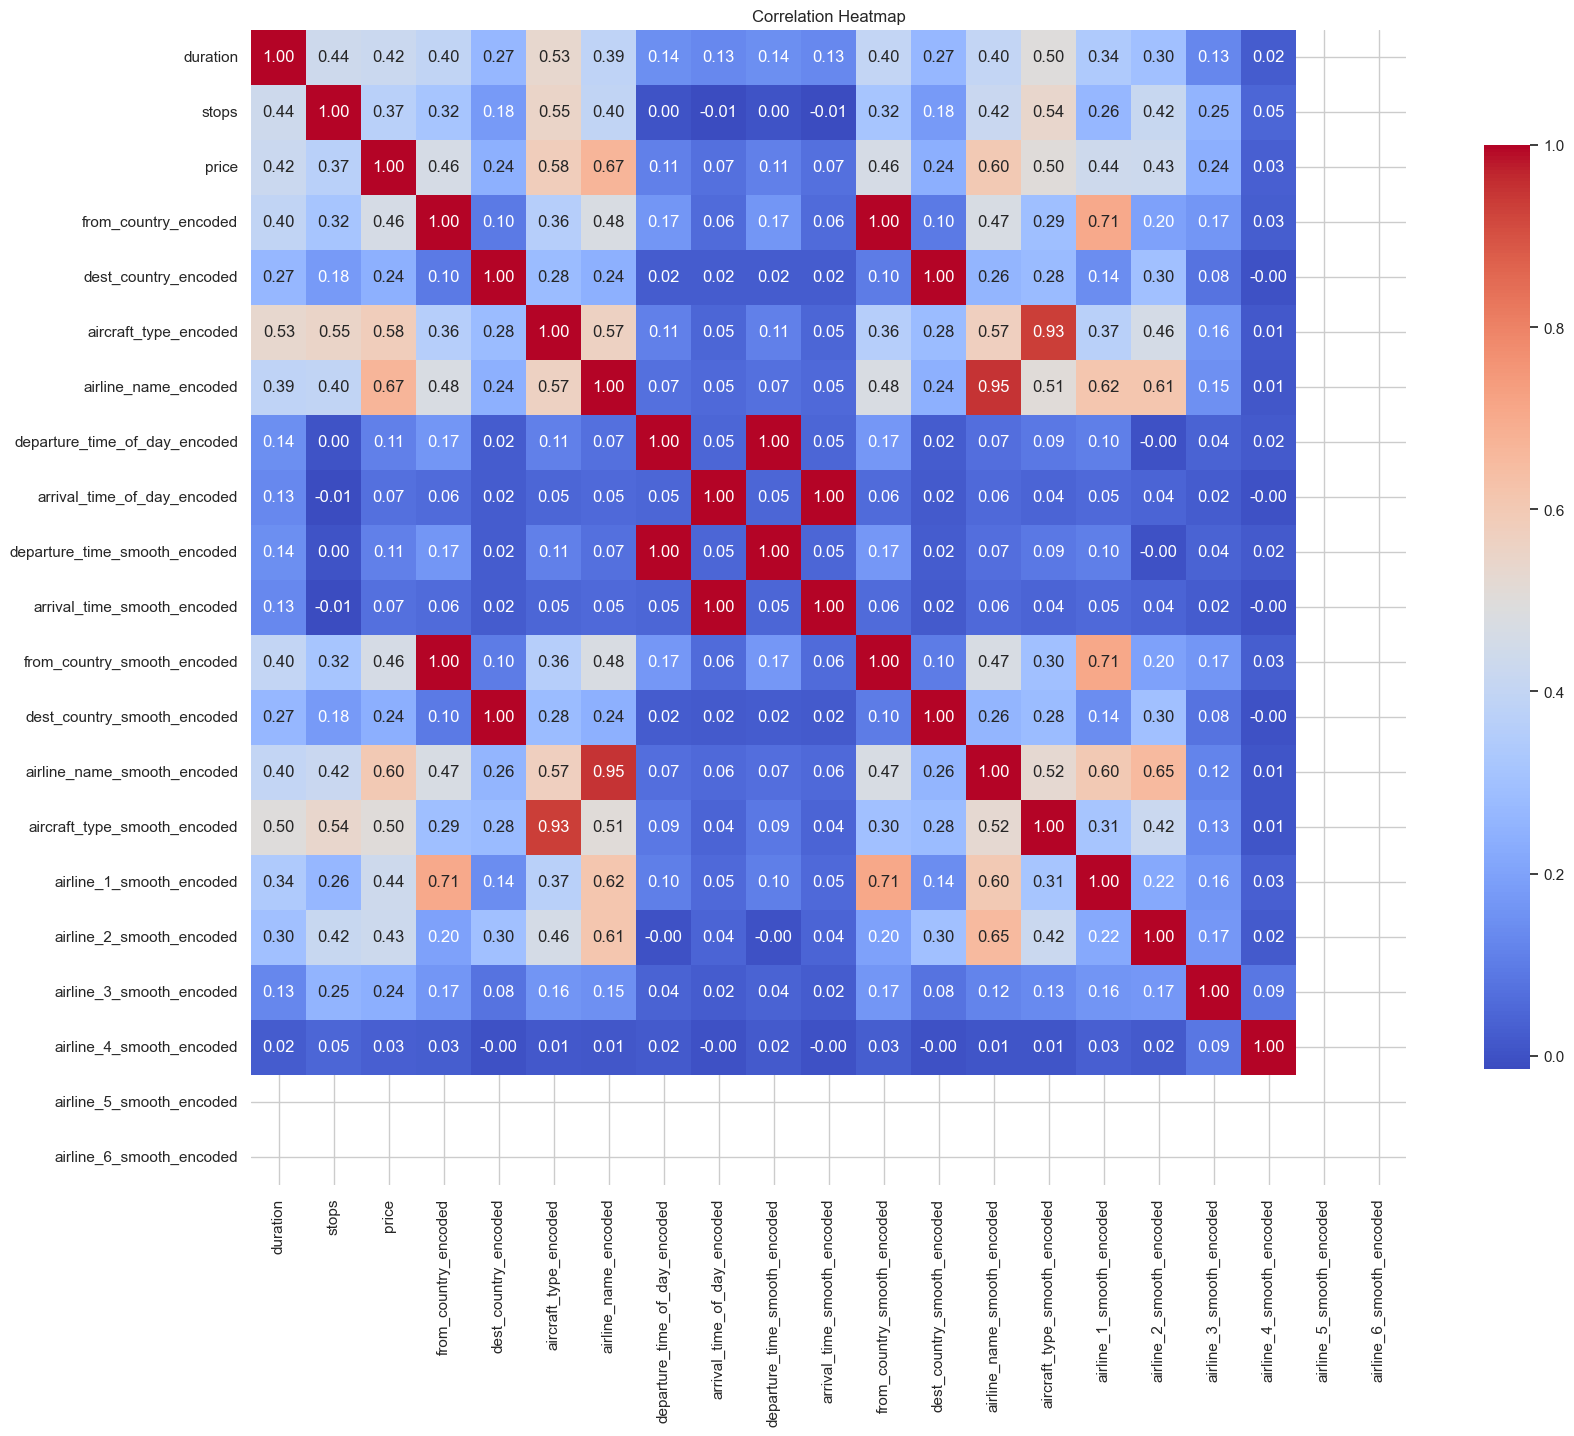

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

df1 = df_cleaned_drop_IF.select_dtypes(include=['float64', 'int64'])

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.heatmap(df1.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

### Model Linear Regression

In [27]:
from sklearn.preprocessing import LabelEncoder

df = df_cleaned_drop_IF.copy()  

le=LabelEncoder()
for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col])

In [28]:
df

,from_country,dest_country,aircraft_type,airline_name,duration,stops,price,departure_time_of_day,arrival_time_of_day,from_country_encoded,...,airline_3,airline_4,airline_5,airline_6,airline_1_smooth_encoded,airline_2_smooth_encoded,airline_3_smooth_encoded,airline_4_smooth_encoded,airline_5_smooth_encoded,airline_6_smooth_encoded
0,6,13,364,332,31.000000,2,820.0,0,3,1185.855724,...,64,15,0,0,1442.468062,1497.209660,1357.103352,1424.728846,1425.7949,1425.7949
1,12,20,3895,1879,30.583333,2,7754.0,4,0,1103.122350,...,42,15,0,0,1446.197132,2472.682936,1886.792601,1424.728846,1425.7949,1425.7949
2,2,17,5815,2972,32.166667,1,5225.0,0,0,1744.178830,...,64,15,0,0,1660.663261,2249.289527,1357.103352,1424.728846,1425.7949,1425.7949
3,8,15,5882,3791,47.750000,2,2200.0,2,3,2688.940989,...,64,15,0,0,1774.711721,1432.746133,1357.103352,1424.728846,1425.7949,1425.7949
4,6,36,3420,1719,20.583333,1,990.0,3,0,1185.855724,...,64,15,0,0,1319.270481,877.373761,1357.103352,1424.728846,1425.7949,1425.7949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99990,3,9,8066,2703,21.233333,2,1657.0,0,1,1057.748906,...,64,15,0,0,1111.034984,1439.786690,1357.103352,1424.728846,1425.7949,1425.7949
99991,5,6,5805,2176,23.833333,2,1673.0,3,3,1827.208654,...,64,15,0,0,1562.108389,1891.801778,1357.103352,1424.728846,1425.7949,1425.7949
99992,10,9,3238,2703,22.566667,2,1721.0,3,1,927.759627,...,64,15,0,0,1111.034984,1439.786690,1357.103352,1424.728846,1425.7949,1425.7949
99993,5,6,2231,2606,19.750000,2,1673.0,0,3,1827.208654,...,64,15,0,0,2286.637976,1891.801778,1357.103352,1424.728846,1425.7949,1425.7949


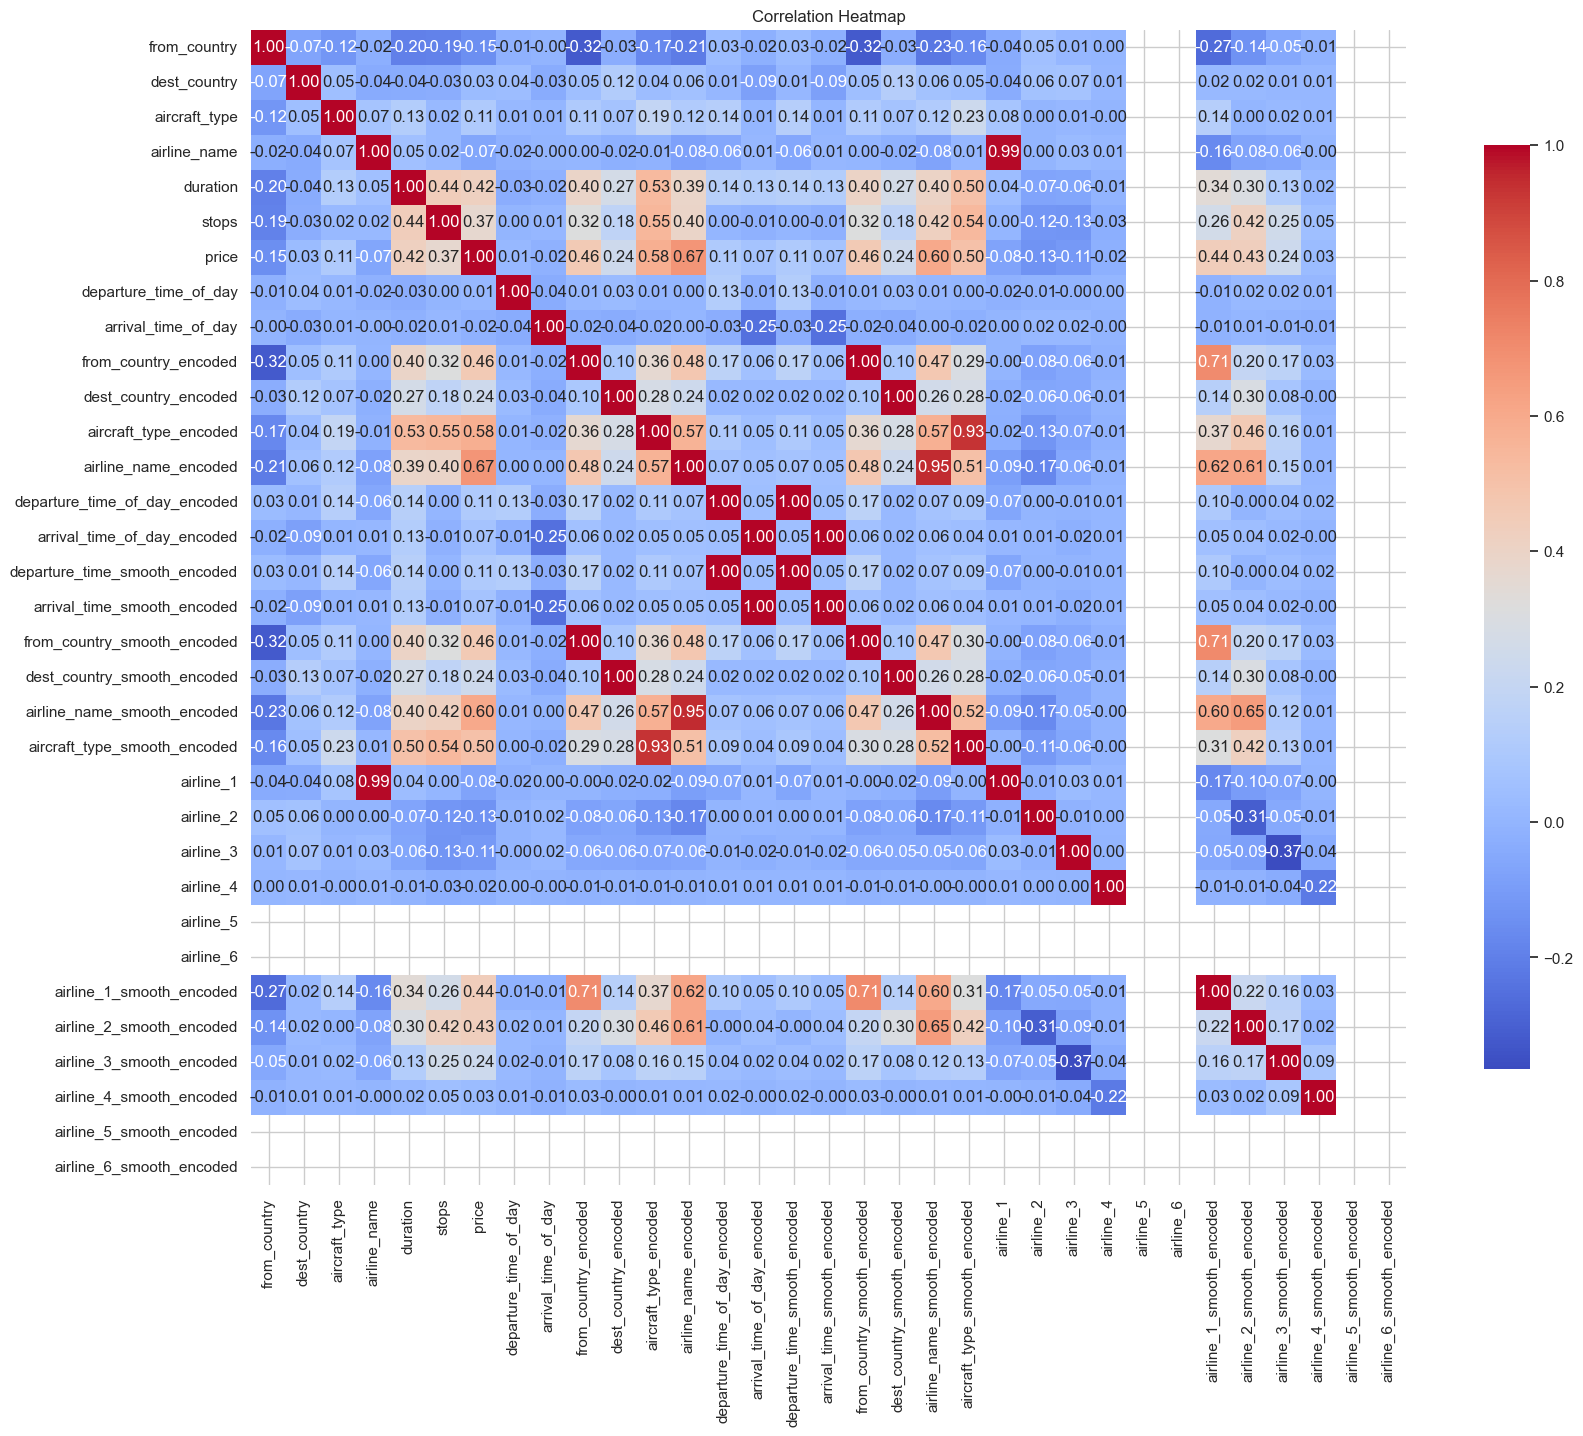

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(20, 15))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.show()

In [30]:
df.columns

Index(['from_country', 'dest_country', 'aircraft_type', 'airline_name',
       'duration', 'stops', 'price', 'departure_time_of_day',
       'arrival_time_of_day', 'from_country_encoded', 'dest_country_encoded',
       'aircraft_type_encoded', 'airline_name_encoded',
       'departure_time_of_day_encoded', 'arrival_time_of_day_encoded',
       'departure_time_smooth_encoded', 'arrival_time_smooth_encoded',
       'from_country_smooth_encoded', 'dest_country_smooth_encoded',
       'airline_name_smooth_encoded', 'aircraft_type_smooth_encoded',
       'airline_1', 'airline_2', 'airline_3', 'airline_4', 'airline_5',
       'airline_6', 'airline_1_smooth_encoded', 'airline_2_smooth_encoded',
       'airline_3_smooth_encoded', 'airline_4_smooth_encoded',
       'airline_5_smooth_encoded', 'airline_6_smooth_encoded'],
      dtype='object')

In [31]:
# storing the Dependent Variables in X and Independent Variable in Y
x=df[[ 'duration', 'stops', 'price', 'departure_time_of_day',
       'arrival_time_of_day', 'from_country_encoded', 'dest_country_encoded',
       'aircraft_type_encoded', 'airline_name_encoded',   
       'from_country_smooth_encoded', 'dest_country_smooth_encoded',
       'airline_name_smooth_encoded', 'aircraft_type_smooth_encoded',
        'airline_1_smooth_encoded', 'airline_2_smooth_encoded',
       'airline_3_smooth_encoded'
       ]]

y=df['price']

In [32]:
# Splitting the Data into Training set and Testing Set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((69996, 16), (29999, 16), (69996,), (29999,))

In [33]:
# Scaling the values to convert the int values to Machine Languages
from sklearn.preprocessing import MinMaxScaler
mmscaler=MinMaxScaler(feature_range=(0,1))
x_train=mmscaler.fit_transform(x_train)
x_test=mmscaler.fit_transform(x_test)
x_train=pd.DataFrame(x_train)
x_test=pd.DataFrame(x_test)  

In [34]:
a={'Model Name':[], 'Mean_Absolute_Error_MAE':[] ,'Adj_R_Square':[] ,'Root_Mean_Squared_Error_RMSE':[] ,'Mean_Absolute_Percentage_Error_MAPE':[] ,'Mean_Squared_Error_MSE':[] ,'Root_Mean_Squared_Log_Error_RMSLE':[] ,'R2_score':[]}
Results=pd.DataFrame(a)
Results.head()

,Model Name,Mean_Absolute_Error_MAE,Adj_R_Square,Root_Mean_Squared_Error_RMSE,Mean_Absolute_Percentage_Error_MAPE,Mean_Squared_Error_MSE,Root_Mean_Squared_Log_Error_RMSLE,R2_score


R² Score: 0.5846
Mean Squared Error: 597351.3003


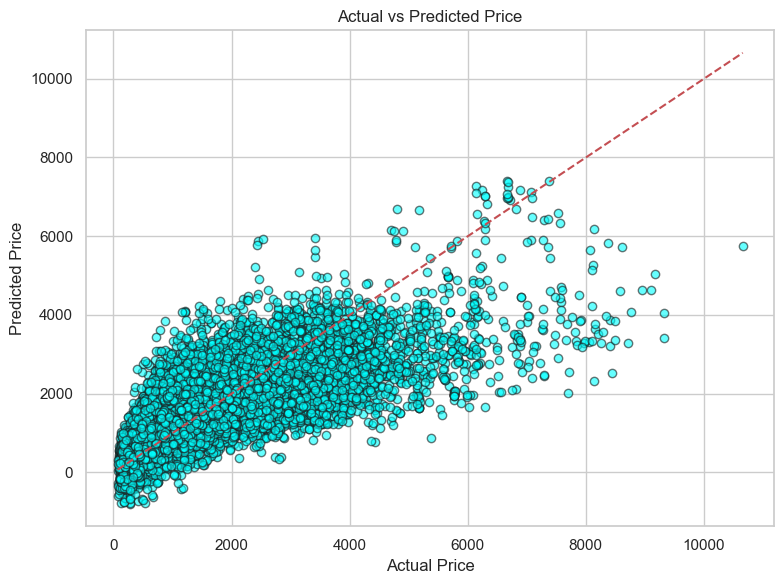

In [36]:
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Drop rows with missing values in selected columns

# Define X and y
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()

In [37]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# Define the model
ridge = Ridge()

# Define hyperparameter grid (alphas are regularization strengths)
param_grid = {'alpha': [0, 0.01, 0.1, 1, 10, 100, 1000, 10000]}

# Grid search with cross-validation
grid_search = GridSearchCV(ridge, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Best model and hyperparameter
best_model = grid_search.best_estimator_
print("Best alpha:", grid_search.best_params_)

# Predictions
y_pred = best_model.predict(X_test)

# Evaluation
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")


Best alpha: {'alpha': 1000}
R² Score: 0.5845
Mean Squared Error: 597440.9030


R² Score: 0.6059
Mean Squared Error: 566714.7173


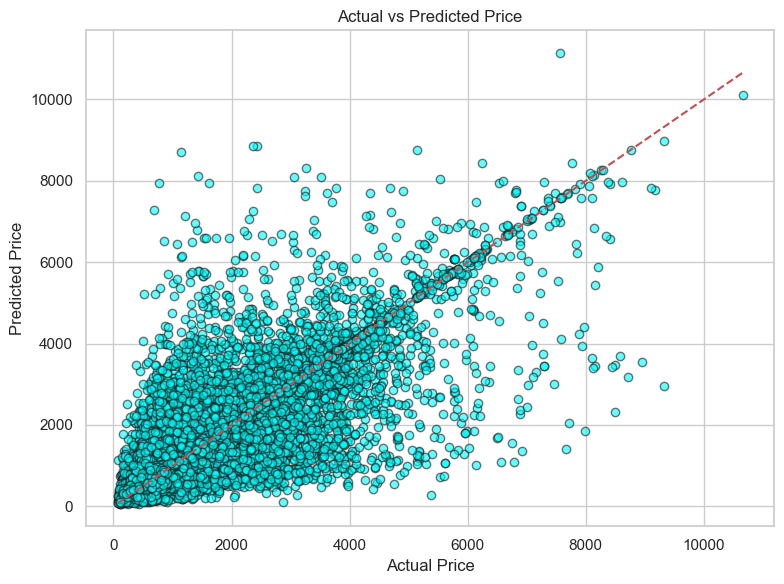

In [38]:
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [39]:
# import seaborn as sns
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, mean_squared_error
# import matplotlib.pyplot as plt

# # Drop rows with missing values in selected columns

# # Define X and y
# X = df.drop(columns=['price'])
# y = df['price']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the regression model
# model = RandomForestRegressor(random_state=42)
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluate
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

# print(f"R² Score: {r2:.4f}")
# print(f"Mean Squared Error: {mse:.4f}")

# # Plot predicted vs actual
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual vs Predicted Price")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


In [40]:
# import seaborn as sns
# from sklearn.svm import SVR
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, mean_squared_error
# import matplotlib.pyplot as plt

# # Drop rows with missing values in selected columns

# # Define X and y
# X = df.drop(columns=['price'])
# y = df['price']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the regression model
# model = SVR()
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluate
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

# print(f"R² Score: {r2:.4f}")
# print(f"Mean Squared Error: {mse:.4f}")

# # Plot predicted vs actual
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual vs Predicted Price")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


R² Score: 0.7624
Mean Squared Error: 341609.2509


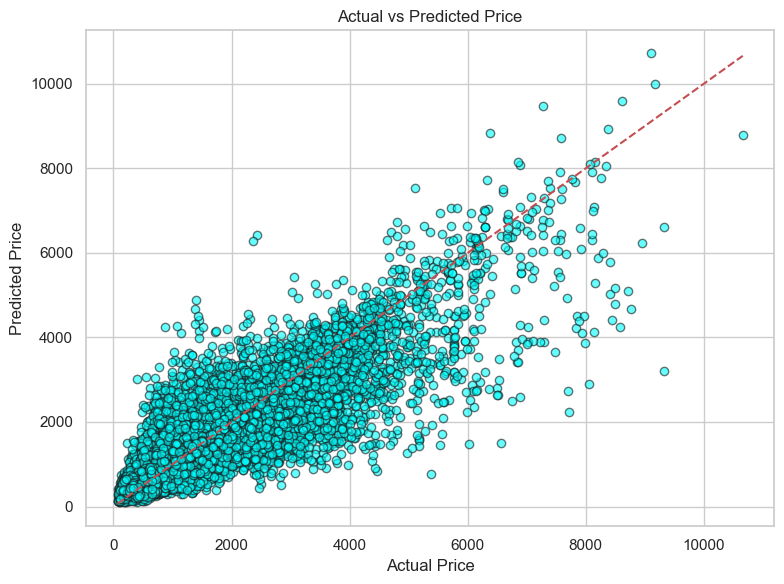

In [41]:
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


R² Score: 0.6884
Mean Squared Error: 448053.3011


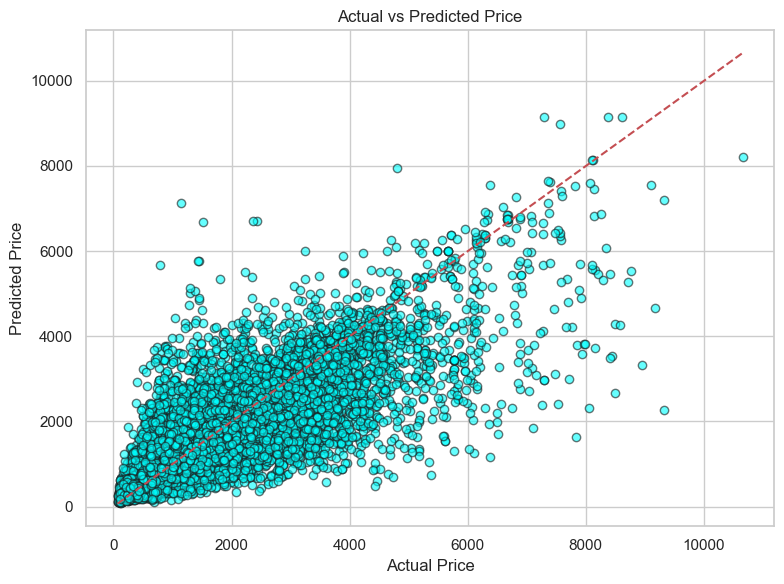

In [42]:
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = KNeighborsRegressor(n_neighbors=5)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [43]:
# import seaborn as sns
# from sklearn.ensemble import ExtraTreesRegressor
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import r2_score, mean_squared_error
# import matplotlib.pyplot as plt

# # Drop rows with missing values in selected columns

# # Define X and y
# X = df.drop(columns=['price'])
# y = df['price']

# # Train-test split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Fit the regression model
# model = ExtraTreesRegressor()
# model.fit(X_train, y_train)

# # Predictions
# y_pred = model.predict(X_test)

# # Evaluate
# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)

# print(f"R² Score: {r2:.4f}")
# print(f"Mean Squared Error: {mse:.4f}")

# # Plot predicted vs actual
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
# plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
# plt.xlabel("Actual Price")
# plt.ylabel("Predicted Price")
# plt.title("Actual vs Predicted Price")
# plt.grid(True)
# plt.tight_layout()
# plt.show()


R² Score: 0.7597
Mean Squared Error: 345539.1922


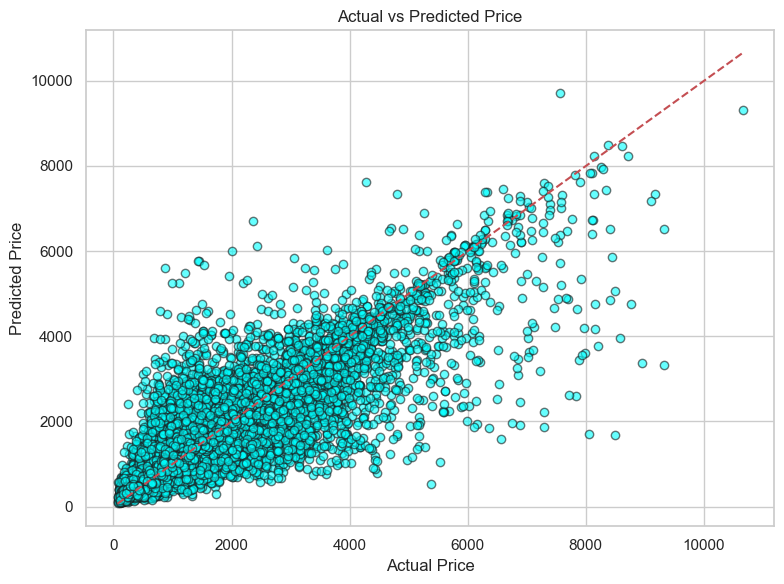

In [44]:
import seaborn as sns
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = BaggingRegressor()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [45]:
!pip install catboost

Learning rate set to 0.081821
0:	learn: 1141.3357418	total: 169ms	remaining: 2m 49s
1:	learn: 1098.6612182	total: 183ms	remaining: 1m 31s
2:	learn: 1059.6914581	total: 193ms	remaining: 1m 4s
3:	learn: 1026.2575459	total: 201ms	remaining: 50.1s
4:	learn: 995.3420068	total: 208ms	remaining: 41.5s
5:	learn: 968.1023367	total: 217ms	remaining: 35.9s
6:	learn: 943.4454091	total: 226ms	remaining: 32.1s
7:	learn: 921.7292710	total: 234ms	remaining: 29s
8:	learn: 903.0048212	total: 240ms	remaining: 26.5s
9:	learn: 886.2224236	total: 247ms	remaining: 24.5s
10:	learn: 871.5542986	total: 255ms	remaining: 22.9s
11:	learn: 858.5673211	total: 264ms	remaining: 21.7s
12:	learn: 847.1520195	total: 272ms	remaining: 20.6s
13:	learn: 836.9820140	total: 279ms	remaining: 19.7s
14:	learn: 827.1885617	total: 288ms	remaining: 18.9s
15:	learn: 817.6353322	total: 298ms	remaining: 18.3s
16:	learn: 810.4387728	total: 306ms	remaining: 17.7s
17:	learn: 802.7207150	total: 315ms	remaining: 17.2s
18:	learn: 796.3918948

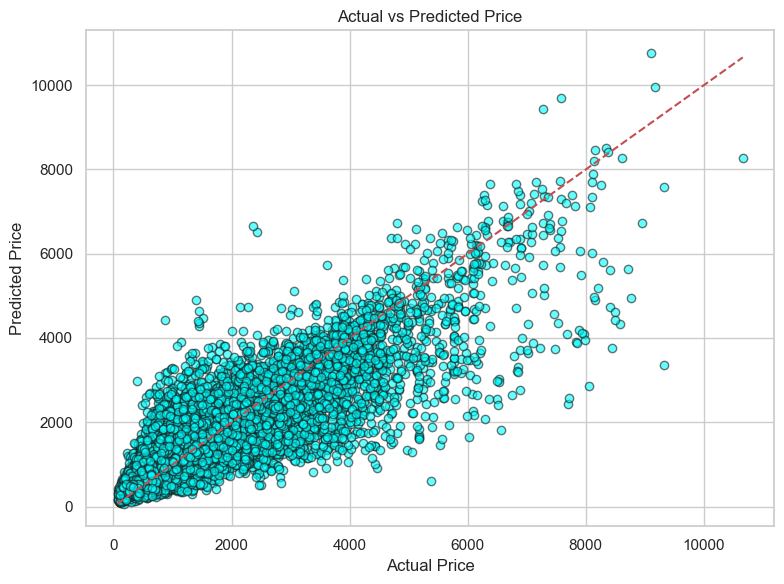

In [46]:
import seaborn as sns
from catboost import CatBoostRegressor 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt

# Drop rows with missing values in selected columns

# Define X and y
X = df.drop(columns=['price'])
y = df['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the regression model
model = CatBoostRegressor(loss_function='RMSE')
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"R² Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")

# Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.6, color='cyan', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Price")
plt.grid(True)
plt.tight_layout()
plt.show()


In [47]:
# Build the Regression / Regressor models

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Create objects of Regression / Regressor models with default hyper-parameters

modelmlg = LinearRegression()
modeldcr = DecisionTreeRegressor()
modelbag = BaggingRegressor()
modelrfr = RandomForestRegressor()
modelSVR = SVR()
modelXGR = xgb.XGBRegressor()
modelKNN = KNeighborsRegressor(n_neighbors=5)
modelETR = ExtraTreesRegressor()
modelRE=Ridge()
modelLO=linear_model.Lasso(alpha=0.1)

modelGBR = GradientBoostingRegressor(loss='ls', learning_rate=0.1, n_estimators=100, subsample=1.0,
                                     criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1,
                                     min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0,
                                     init=None, random_state=None, max_features=None,
                                     alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False,
                                     validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)

# Evalution matrix for all the algorithms

MM = [modelmlg, modeldcr, modelrfr, modelKNN, modelETR, modelGBR]

for models in MM:

    # Fit the model with train data

    models.fit(x_train, y_train)

    # Predict the model with test data

    y_pred = models.predict(x_test)

    # Print the model name

    print('Model Name: ', models)

    # Evaluation metrics for Regression analysis

    from sklearn import metrics

    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))
    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))
    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))
    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))
    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))

    # Define the function to calculate the MAPE - Mean Absolute Percentage Error

    def MAPE (y_test, y_pred):
        y_test, y_pred = np.array(y_test), np.array(y_pred)
        return np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Evaluation of MAPE

    result = MAPE(y_test, y_pred)
    print('Mean Absolute Percentage Error (MAPE):', round(result, 2), '%')

    # Calculate Adjusted R squared values

    r_squared = round(metrics.r2_score(y_test, y_pred),6)
    adjusted_r_squared = round(1 - (1-r_squared)*(len(y)-1)/(len(y)-x.shape[1]-1),6)
    print('Adj R Square: ', adjusted_r_squared)
    print('------------------------------------------------------------------------------------------------------------')
    #-------------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Mean_Absolute_Error_MAE' : metrics.mean_absolute_error(y_test, y_pred),
               'Adj_R_Square' : adjusted_r_squared,
               'Root_Mean_Squared_Error_RMSE' : np.sqrt(metrics.mean_squared_error(y_test, y_pred)),
               'Mean_Absolute_Percentage_Error_MAPE' : result,
               'Mean_Squared_Error_MSE' : metrics.mean_squared_error(y_test, y_pred),
               'Root_Mean_Squared_Log_Error_RMSLE': np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),
               'R2_score' : metrics.r2_score(y_test, y_pred)}
    Results = pd.concat([Results, pd.DataFrame([new_row])], ignore_index=True)

    #------------------------------------------------------------

ValueError: Found input variables with inconsistent numbers of samples: [69996, 79996]